In [ ]:
import sys
print('sys : {}'.format(sys.version))
import scipy
print('scipy : {}'.format(scipy.__version__))
import numpy
print('numpy : {}'.format(numpy.__version__))
import matplotlib
print('matplotlib : {}'.format(matplotlib.__version__))
import pandas
print('pandas : {}'.format(pandas.__version__))
import sklearn
print('sklearn : {}'.format(sklearn.__version__))

sys : 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
scipy : 1.11.1
numpy : 1.24.3
matplotlib : 3.7.2
pandas : 2.0.3
sklearn : 1.3.0


In [ ]:
import pandas

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [ ]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


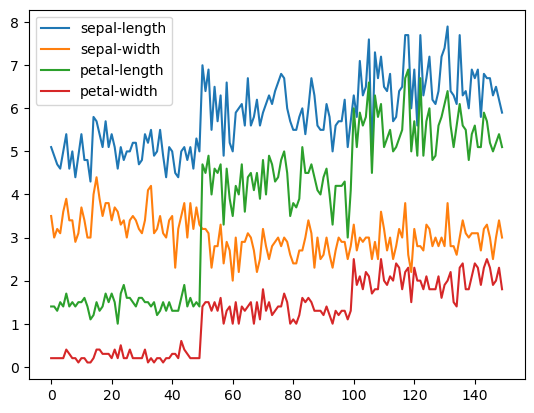

In [ ]:
dataset.plot()
plt.show()

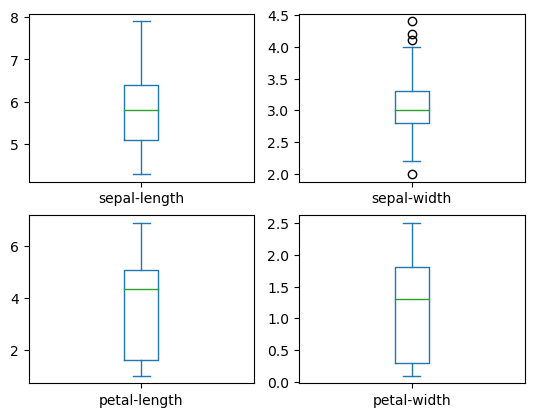

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

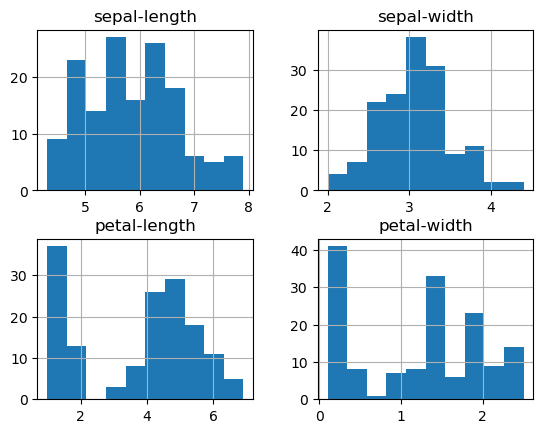

In [ ]:
dataset.hist()
plt.show()

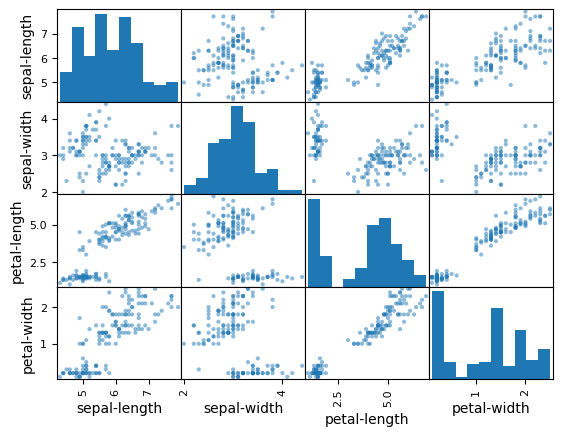

In [ ]:
scatter_matrix(dataset)
plt.show()

In [ ]:
array = dataset.values

X = array[:,0:4]

Y = array[:,4]

validation_size = 0.20

seed = 6

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [ ]:
seed = 6
scoring = 'accuracy'

In [ ]:
models = []

models.append(('LR', LogisticRegression()))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC()))

#results = []

#names = []

for name, model in models:

    kfold = model_selection.KFold(n_splits=10)

    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

    #results.append(cv_results)

    #names.append (name)

    msg="%s: %f (%f)" % (name, cv_results.mean (), cv_results.std())

    print (msg)

C:\Users\srisu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\srisu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.950000 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.933333 (0.072648)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.076376)


In [ ]:
models = []

models.append(('LR', LogisticRegression()))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC()))

#results = []

#names = []

for name, model in models:

    kfold = model_selection.KFold(n_splits=10)

    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)

    #results.append(cv_results)

    #names.append (name)

    msg="%s: %f (%f)" % (name, cv_results.mean (), cv_results.std())

    print (msg)

LR: 0.900000 (0.213437)
LDA: 0.966667 (0.100000)
KNN: 0.933333 (0.133333)
CART: 0.866667 (0.221108)
NB: 0.900000 (0.213437)
SVM: 0.933333 (0.133333)
